In [7]:
import pandas as pd
df=pd.read_csv('C:\\Users\\abhir\\OneDrive\Desktop\\Data Science using Python\\fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df
%matplotlib notebook

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [12]:
df=df.sort_values(by=['ID','Date'])
df=df.reset_index(drop=True)
df

,ID,Date,Element,Data_Value
0,USC00200032,2005-01-01,TMIN,-28
1,USC00200032,2005-01-01,TMAX,67
2,USC00200032,2005-01-02,TMAX,122
3,USC00200032,2005-01-02,TMIN,-6
4,USC00200032,2005-01-03,TMIN,11
...,...,...,...,...
165080,USW00094889,2015-12-29,TMAX,50
165081,USW00094889,2015-12-30,TMAX,6
165082,USW00094889,2015-12-30,TMIN,-5
165083,USW00094889,2015-12-31,TMAX,-5


In [21]:
df['Year'],df['Month-date']=zip(*df['Date'].apply(lambda x:(x[:4],x[5:])))
df=df[df['Month-date']!='02-29']

In [29]:
df

,ID,Date,Element,Data_Value,Year,Month-date
0,USC00200032,2005-01-01,TMIN,-28,2005,01-01
1,USC00200032,2005-01-01,TMAX,67,2005,01-01
2,USC00200032,2005-01-02,TMAX,122,2005,01-02
3,USC00200032,2005-01-02,TMIN,-6,2005,01-02
4,USC00200032,2005-01-03,TMIN,11,2005,01-03
...,...,...,...,...,...,...
165080,USW00094889,2015-12-29,TMAX,50,2015,12-29
165081,USW00094889,2015-12-30,TMAX,6,2015,12-30
165082,USW00094889,2015-12-30,TMIN,-5,2015,12-30
165083,USW00094889,2015-12-31,TMAX,-5,2015,12-31


In [33]:
import numpy as np
min_temp_2015=df[(df['Element']=='TMIN')&(df['Year']=='2015')].groupby('Month-date').aggregate({'Data_Value':np.min})
max_temp_2015=df[(df['Element']=='TMAX')&(df['Year']=='2015')].groupby('Month-date').aggregate({'Data_Value':np.max})


In [153]:
min_temp_2015

,Data_Value
Month-date,
01-01,-133
01-02,-122
01-03,-67
01-04,-88
01-05,-155
...,...
12-27,-6
12-28,-39
12-29,-39


In [38]:
min_temp_not2015=df[(df['Element']=='TMIN')&(df['Year']!='2015')].groupby('Month-date').aggregate({'Data_Value':np.min})
max_temp_not2015=df[(df['Element']=='TMAX')&(df['Year']!='2015')].groupby('Month-date').aggregate({'Data_Value':np.max})

In [39]:
min_temp_not2015.head()

,Data_Value
Month-date,
01-01,-160
01-02,-267
01-03,-267
01-04,-261
01-05,-150


In [40]:
record_max=np.where(max_temp_2015['Data_Value']>max_temp_not2015['Data_Value'])

In [131]:
record_max

(array([ 39, 106, 126, 127, 130, 137, 207, 209, 230, 249, 250, 258, 259,
        260, 270, 271, 292, 305, 306, 307, 308, 309, 321, 340, 341, 342,
        343, 344, 345, 346, 347, 348, 349, 356, 357, 358, 359], dtype=int64),)

In [132]:
record_min=np.where(min_temp_2015['Data_Value']<min_temp_not2015['Data_Value'])

In [133]:
record_min

(array([  4,  10,  33,  44,  45,  46,  47,  49,  50,  51,  53,  54,  55,
         56,  57,  58,  63,  64,  65,  86,  87,  88, 113, 114, 139, 183,
        239, 289, 290, 291, 292, 313], dtype=int64),)

In [51]:
print(min_temp_not2015.head())
print(min_temp_2015.head())

            Data_Value
Month-date            
01-01             -160
01-02             -267
01-03             -267
01-04             -261
01-05             -150
            Data_Value
Month-date            
01-01             -133
01-02             -122
01-03              -67
01-04              -88
01-05             -155


Text(0, 0.5, 'Temperature (Tenths of Degrees C)')

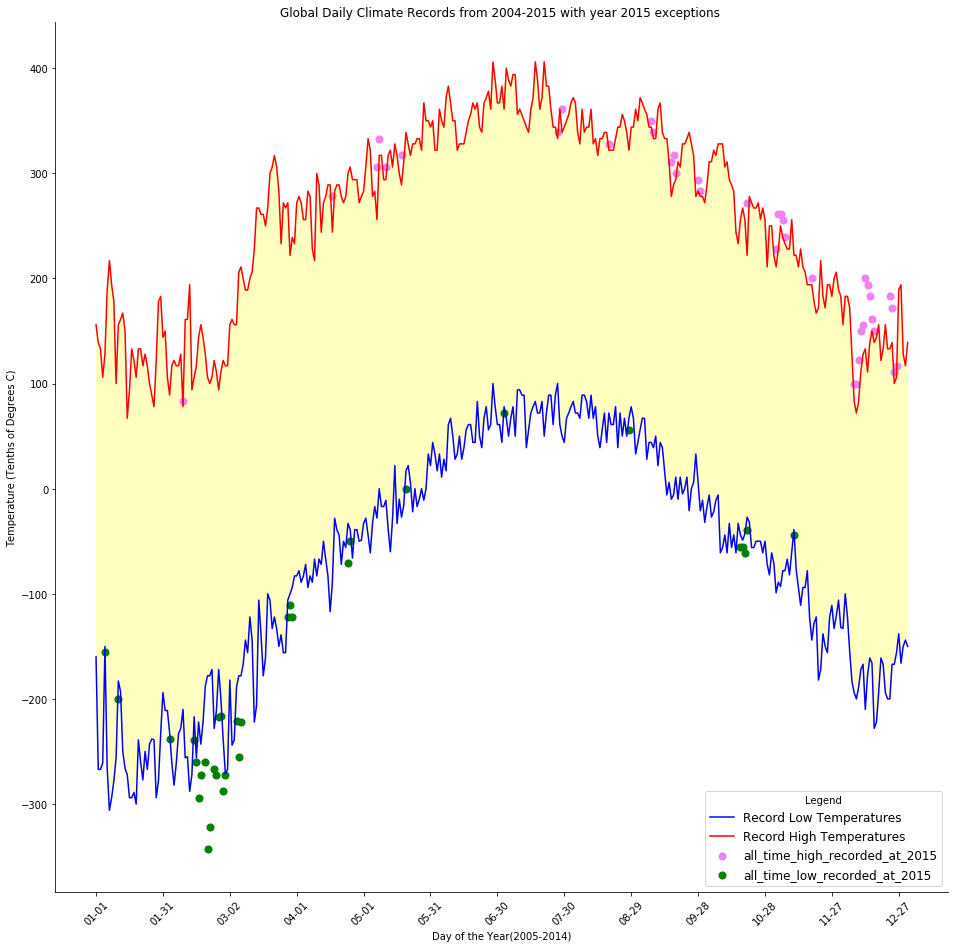

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.plot(min_temp_not2015.values,c='b',label='Record Low Temperatures')
plt.plot(max_temp_not2015.values,c='r',label='Record High Temperatures')
plt.gca().fill_between(range(len(min_temp_not2015)),min_temp_not2015['Data_Value'],max_temp_not2015['Data_Value'],facecolor='yellow',alpha=0.25)
plt.scatter(record_max,max_temp_2015.iloc[record_max]['Data_Value'],s=50,c='violet',label='all_time_high_recorded_at_2015')
plt.scatter(record_min,min_temp_2015.iloc[record_min]['Data_Value'],s=50,c='green',label='all_time_low_recorded_at_2015')
plt.legend(loc=4,frameon=True,title='Legend',fontsize=12)
plt.xticks(range(0, len(min_temp_not2015), 30), min_temp_not2015.index[range(0, len(min_temp_not2015), 30)], rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Global Daily Climate Records from 2004-2015 with year 2015 exceptions ')
plt.xlabel('Day of the Year(2005-2014)')
plt.ylabel('Temperature (Tenths of Degrees C)')
